In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
import time

In [2]:
dataset = pd.read_csv('./data/[1m]BTCUSDT.csv')

In [3]:
dataset['Start'] = pd.to_datetime(dataset["Start"].to_numpy(), unit='ms')
dataset['Stop'] = pd.to_datetime(dataset["Stop"].to_numpy(), unit='ms')

In [4]:
display(dataset)

,Start,Stop,Open,Close,Low,High,Volume
0,2017-08-17 04:00:00,2017-08-17 04:00:59.999,4261.48,4261.48,4261.48,4261.48,1.775183
1,2017-08-17 04:01:00,2017-08-17 04:01:59.999,4261.48,4261.48,4261.48,4261.48,0.000000
2,2017-08-17 04:02:00,2017-08-17 04:02:59.999,4280.56,4280.56,4280.56,4280.56,0.261074
3,2017-08-17 04:03:00,2017-08-17 04:03:59.999,4261.48,4261.48,4261.48,4261.48,0.012008
4,2017-08-17 04:04:00,2017-08-17 04:04:59.999,4261.48,4261.48,4261.48,4261.48,0.140796
...,...,...,...,...,...,...,...
1767788,2020-12-31 23:56:00,2020-12-31 23:56:59.999,28978.91,28975.06,28969.99,28988.06,19.086172
1767789,2020-12-31 23:57:00,2020-12-31 23:57:59.999,28975.06,28975.03,28955.35,28981.41,21.327772
1767790,2020-12-31 23:58:00,2020-12-31 23:58:59.999,28975.03,28923.67,28923.15,28977.10,36.070975
1767791,2020-12-31 23:59:00,2020-12-31 23:59:59.999,28923.66,28923.63,28903.86,28952.28,51.895343


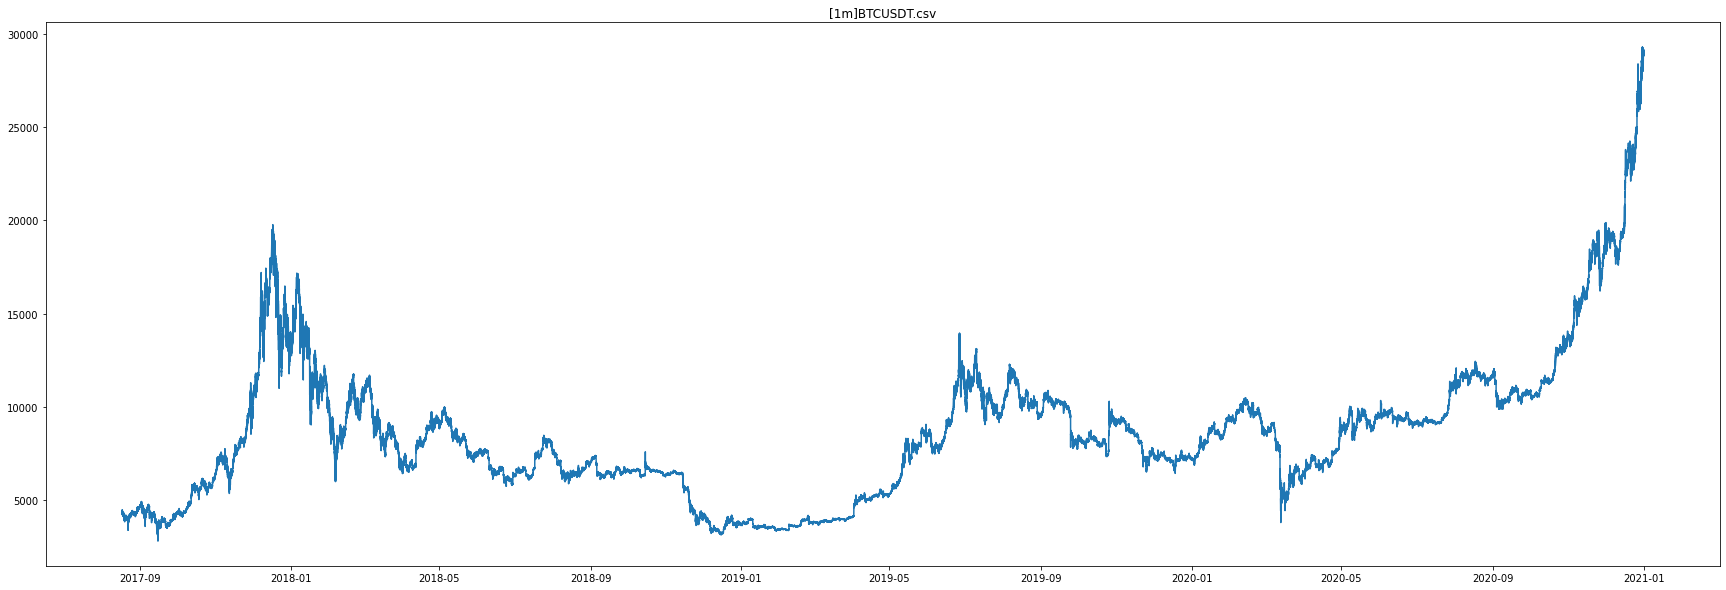

In [5]:
x_m = dataset['Stop']
y_m = dataset["Close"]
plt.figure(figsize=(30, 10))
plt.plot(x_m, y_m)
plt.title('[1m]BTCUSDT.csv')
plt.show()

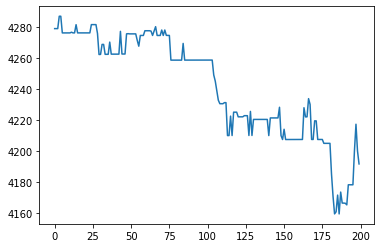

In [6]:
x = y_m[33400:33600].to_numpy()
plt.plot(x)


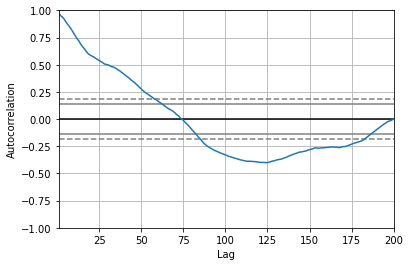

In [7]:
autocorrelation_plot(x)
plt.show()

{'p': 0, 'd': 0, 'q': 0, 'rmse': 22.48196557045696, 'time_spend': 0.0596612548828125, 'predictions': [4278.75, 4278.75, 4278.75, 4286.7, 4286.7, 4275.98, 4275.98, 4275.98, 4275.99, 4275.99, 4275.99, 4276.43, 4276.0, 4276.0, 4281.28, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4281.32, 4281.32, 4281.32, 4281.32, 4275.65, 4262.1, 4262.18, 4268.59, 4268.59, 4262.22, 4262.22, 4262.24, 4270.09, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4276.99, 4262.42, 4262.42, 4262.42, 4275.37, 4275.5, 4275.37, 4275.37, 4275.37, 4275.37, 4275.37, 4271.17, 4267.46, 4274.35, 4274.35, 4274.35, 4277.38, 4277.38, 4277.38, 4277.38, 4277.17, 4274.35, 4277.18, 4280.0, 4274.35, 4274.35, 4274.35, 4277.84, 4274.35, 4277.85, 4274.41, 4274.35, 4274.35, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4269.23, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.

c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 0, 'd': 0, 'q': 2, 'rmse': 8.803517455520081, 'time_spend': 0.22360811233520508, 'predictions': [4278.75, 4278.75, 4278.75, 4286.7, 4286.7, 4275.98, 4275.98, 4275.98, 4275.99, 4275.99, 4275.99, 4276.43, 4276.0, 4276.0, 4281.28, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4281.32, 4281.32, 4281.32, 4281.32, 4275.65, 4262.1, 4262.18, 4268.59, 4268.59, 4262.22, 4262.22, 4262.24, 4270.09, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4276.99, 4262.42, 4262.42, 4262.42, 4275.37, 4275.5, 4275.37, 4275.37, 4275.37, 4275.37, 4275.37, 4271.17, 4267.46, 4274.35, 4274.35, 4274.35, 4277.38, 4277.38, 4277.38, 4277.38, 4277.17, 4274.35, 4277.18, 4280.0, 4274.35, 4274.35, 4274.35, 4277.84, 4274.35, 4277.85, 4274.41, 4274.35, 4274.35, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4269.23, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258

c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 0, 'd': 2, 'q': 2, 'rmse': 3.864833088316895, 'time_spend': 0.14278071403503417, 'predictions': [4278.75, 4278.75, 4278.75, 4286.7, 4286.7, 4275.98, 4275.98, 4275.98, 4275.99, 4275.99, 4275.99, 4276.43, 4276.0, 4276.0, 4281.28, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4281.32, 4281.32, 4281.32, 4281.32, 4275.65, 4262.1, 4262.18, 4268.59, 4268.59, 4262.22, 4262.22, 4262.24, 4270.09, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4276.99, 4262.42, 4262.42, 4262.42, 4275.37, 4275.5, 4275.37, 4275.37, 4275.37, 4275.37, 4275.37, 4271.17, 4267.46, 4274.35, 4274.35, 4274.35, 4277.38, 4277.38, 4277.38, 4277.38, 4277.17, 4274.35, 4277.18, 4280.0, 4274.35, 4274.35, 4274.35, 4277.84, 4274.35, 4277.85, 4274.41, 4274.35, 4274.35, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4269.23, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258

c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


{'p': 1, 'd': 0, 'q': 1, 'rmse': 3.8535894580329266, 'time_spend': 0.15584996223449707, 'predictions': [4278.75, 4278.75, 4278.75, 4286.7, 4286.7, 4275.98, 4275.98, 4275.98, 4275.99, 4275.99, 4275.99, 4276.43, 4276.0, 4276.0, 4281.28, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4281.32, 4281.32, 4281.32, 4281.32, 4275.65, 4262.1, 4262.18, 4268.59, 4268.59, 4262.22, 4262.22, 4262.24, 4270.09, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4276.99, 4262.42, 4262.42, 4262.42, 4275.37, 4275.5, 4275.37, 4275.37, 4275.37, 4275.37, 4275.37, 4271.17, 4267.46, 4274.35, 4274.35, 4274.35, 4277.38, 4277.38, 4277.38, 4277.38, 4277.17, 4274.35, 4277.18, 4280.0, 4274.35, 4274.35, 4274.35, 4277.84, 4274.35, 4277.85, 4274.41, 4274.35, 4274.35, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4269.23, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 425

c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


{'p': 1, 'd': 0, 'q': 2, 'rmse': 3.8334933134430353, 'time_spend': 0.2502808952331543, 'predictions': [4278.75, 4278.75, 4278.75, 4286.7, 4286.7, 4275.98, 4275.98, 4275.98, 4275.99, 4275.99, 4275.99, 4276.43, 4276.0, 4276.0, 4281.28, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4281.32, 4281.32, 4281.32, 4281.32, 4275.65, 4262.1, 4262.18, 4268.59, 4268.59, 4262.22, 4262.22, 4262.24, 4270.09, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4276.99, 4262.42, 4262.42, 4262.42, 4275.37, 4275.5, 4275.37, 4275.37, 4275.37, 4275.37, 4275.37, 4271.17, 4267.46, 4274.35, 4274.35, 4274.35, 4277.38, 4277.38, 4277.38, 4277.38, 4277.17, 4274.35, 4277.18, 4280.0, 4274.35, 4274.35, 4274.35, 4277.84, 4274.35, 4277.85, 4274.41, 4274.35, 4274.35, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4269.23, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258

c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 1, 'd': 1, 'q': 2, 'rmse': 3.8722747915283264, 'time_spend': 0.19633208274841307, 'predictions': [4278.75, 4278.75, 4278.75, 4286.7, 4286.7, 4275.98, 4275.98, 4275.98, 4275.99, 4275.99, 4275.99, 4276.43, 4276.0, 4276.0, 4281.28, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4281.32, 4281.32, 4281.32, 4281.32, 4275.65, 4262.1, 4262.18, 4268.59, 4268.59, 4262.22, 4262.22, 4262.24, 4270.09, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4276.99, 4262.42, 4262.42, 4262.42, 4275.37, 4275.5, 4275.37, 4275.37, 4275.37, 4275.37, 4275.37, 4271.17, 4267.46, 4274.35, 4274.35, 4274.35, 4277.38, 4277.38, 4277.38, 4277.38, 4277.17, 4274.35, 4277.18, 4280.0, 4274.35, 4274.35, 4274.35, 4277.84, 4274.35, 4277.85, 4274.41, 4274.35, 4274.35, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4269.23, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 425

c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 2, 'q': 2, 'rmse': 3.8938066135086347, 'time_spend': 0.25308929443359374, 'predictions': [4278.75, 4278.75, 4278.75, 4286.7, 4286.7, 4275.98, 4275.98, 4275.98, 4275.99, 4275.99, 4275.99, 4276.43, 4276.0, 4276.0, 4281.28, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4281.32, 4281.32, 4281.32, 4281.32, 4275.65, 4262.1, 4262.18, 4268.59, 4268.59, 4262.22, 4262.22, 4262.24, 4270.09, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4276.99, 4262.42, 4262.42, 4262.42, 4275.37, 4275.5, 4275.37, 4275.37, 4275.37, 4275.37, 4275.37, 4271.17, 4267.46, 4274.35, 4274.35, 4274.35, 4277.38, 4277.38, 4277.38, 4277.38, 4277.17, 4274.35, 4277.18, 4280.0, 4274.35, 4274.35, 4274.35, 4277.84, 4274.35, 4277.85, 4274.41, 4274.35, 4274.35, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4269.23, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 425

c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


{'p': 2, 'd': 0, 'q': 0, 'rmse': 3.7684336525806805, 'time_spend': 0.13916277885437012, 'predictions': [4278.75, 4278.75, 4278.75, 4286.7, 4286.7, 4275.98, 4275.98, 4275.98, 4275.99, 4275.99, 4275.99, 4276.43, 4276.0, 4276.0, 4281.28, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4281.32, 4281.32, 4281.32, 4281.32, 4275.65, 4262.1, 4262.18, 4268.59, 4268.59, 4262.22, 4262.22, 4262.24, 4270.09, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4276.99, 4262.42, 4262.42, 4262.42, 4275.37, 4275.5, 4275.37, 4275.37, 4275.37, 4275.37, 4275.37, 4271.17, 4267.46, 4274.35, 4274.35, 4274.35, 4277.38, 4277.38, 4277.38, 4277.38, 4277.17, 4274.35, 4277.18, 4280.0, 4274.35, 4274.35, 4274.35, 4277.84, 4274.35, 4277.85, 4274.41, 4274.35, 4274.35, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4269.23, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 425

c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimizatio

{'p': 2, 'd': 0, 'q': 1, 'rmse': 3.8402172662293297, 'time_spend': 0.2883969593048096, 'predictions': [4278.75, 4278.75, 4278.75, 4286.7, 4286.7, 4275.98, 4275.98, 4275.98, 4275.99, 4275.99, 4275.99, 4276.43, 4276.0, 4276.0, 4281.28, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4281.32, 4281.32, 4281.32, 4281.32, 4275.65, 4262.1, 4262.18, 4268.59, 4268.59, 4262.22, 4262.22, 4262.24, 4270.09, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4276.99, 4262.42, 4262.42, 4262.42, 4275.37, 4275.5, 4275.37, 4275.37, 4275.37, 4275.37, 4275.37, 4271.17, 4267.46, 4274.35, 4274.35, 4274.35, 4277.38, 4277.38, 4277.38, 4277.38, 4277.17, 4274.35, 4277.18, 4280.0, 4274.35, 4274.35, 4274.35, 4277.84, 4274.35, 4277.85, 4274.41, 4274.35, 4274.35, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4269.23, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258

c:\python\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\python\venv\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimizatio

{'p': 2, 'd': 0, 'q': 2, 'rmse': 3.876455462869051, 'time_spend': 0.3905138778686523, 'predictions': [4278.75, 4278.75, 4278.75, 4286.7, 4286.7, 4275.98, 4275.98, 4275.98, 4275.99, 4275.99, 4275.99, 4276.43, 4276.0, 4276.0, 4281.28, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4276.0, 4281.32, 4281.32, 4281.32, 4281.32, 4275.65, 4262.1, 4262.18, 4268.59, 4268.59, 4262.22, 4262.22, 4262.24, 4270.09, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4262.34, 4276.99, 4262.42, 4262.42, 4262.42, 4275.37, 4275.5, 4275.37, 4275.37, 4275.37, 4275.37, 4275.37, 4271.17, 4267.46, 4274.35, 4274.35, 4274.35, 4277.38, 4277.38, 4277.38, 4277.38, 4277.17, 4274.35, 4277.18, 4280.0, 4274.35, 4274.35, 4274.35, 4277.84, 4274.35, 4277.85, 4274.41, 4274.35, 4274.35, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4258.49, 4269.23, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.51, 4258.

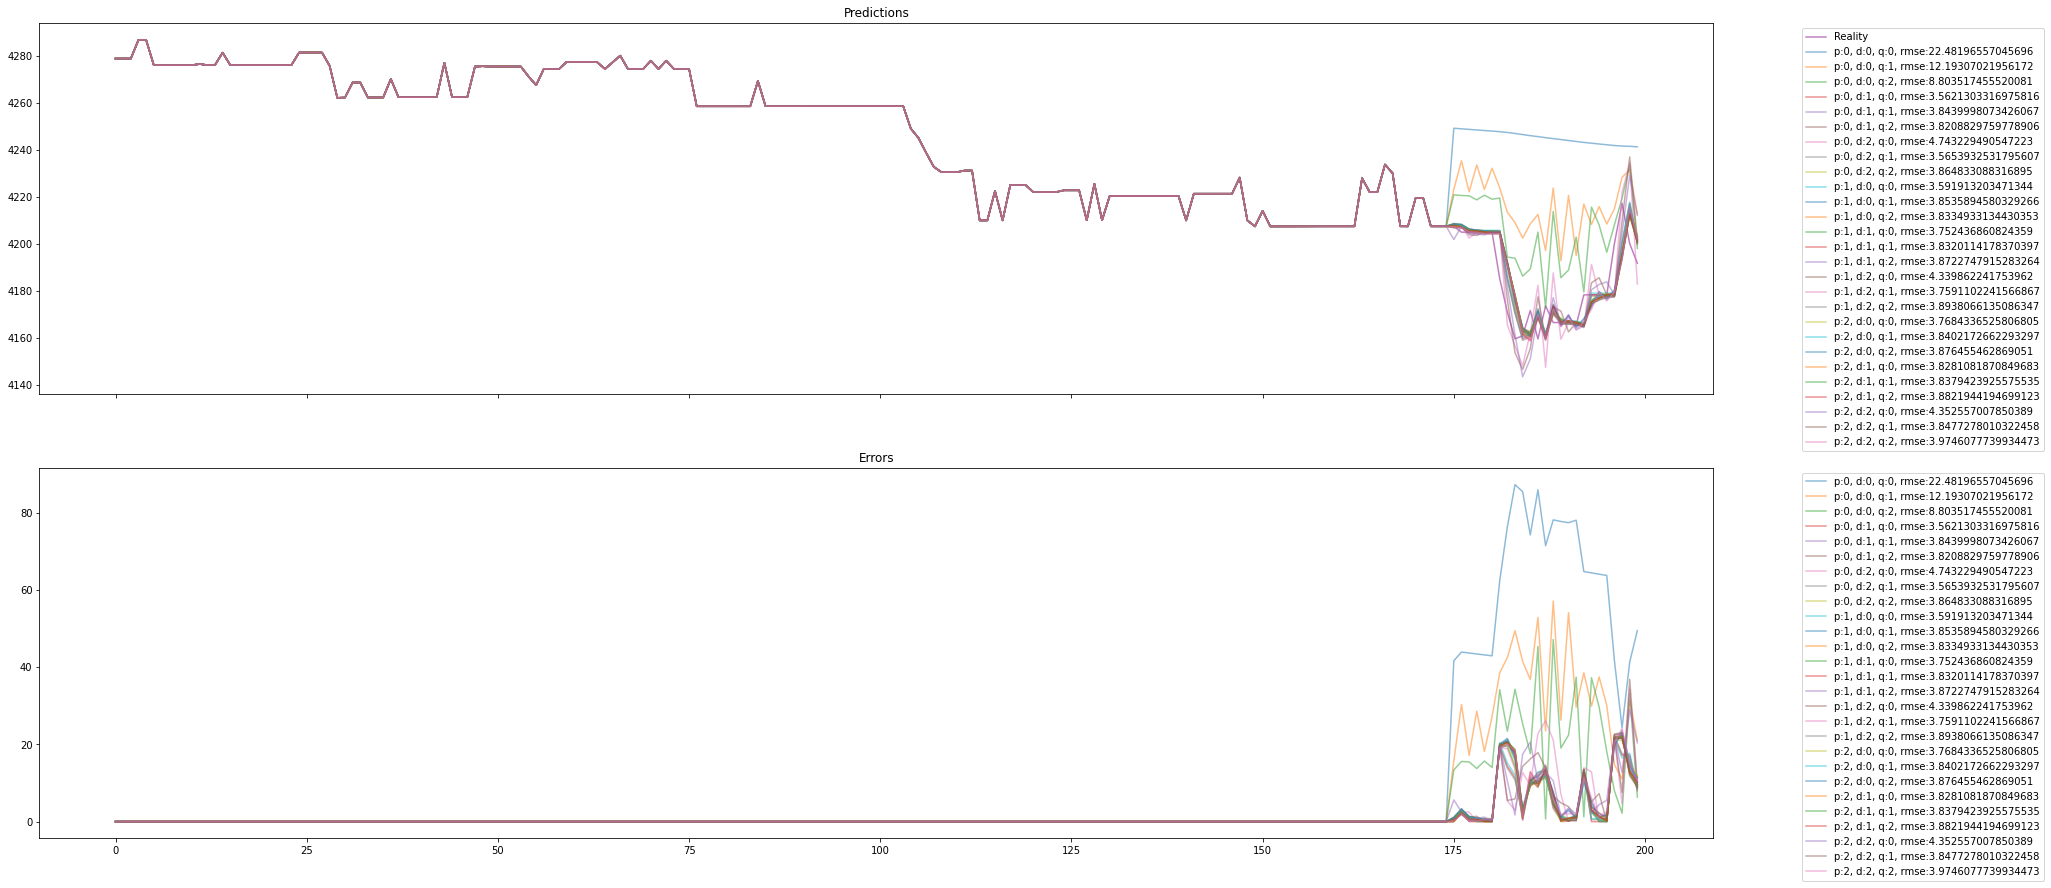

In [8]:
size = len(x) - 25
train, test = x[0:size], x[size:len(x)]
experiments = []
for p in [0, 1, 2]:
    for d in [0, 1, 2]:
        for q in [0, 1, 2]:
            experiment = { 'p': p, 'd': d, 'q': q}

            history = train.tolist()
            predictions = train.tolist()
            errors = [0] * len(history)
            time_spend = 0

            for i in range(len(test)):
                model = ARIMA(history, order=(p, d, q))
                cur_time = time.time()
                model_fit = model.fit()
                time_spend = time_spend + (time.time() - cur_time)
                
                predict = model_fit.forecast()[0]
                predictions.append(predict)

                true = test[i]
                history.append(true)

                # error
                err = np.abs(true - predict)
                errors.append(err)
                
            # evaluate forecasts
           
            rmse = np.sqrt(mean_squared_error(x, predictions))

            time_spend = time_spend / len(test)
            experiment['rmse'] = rmse
            experiment['time_spend'] = time_spend
            experiment['predictions'] = predictions
            experiment['errors'] = errors
            experiments.append(experiment)
            print(experiment)
            
fig, (x_1, x_2) = plt.subplots(2, 1, figsize=(30,15), sharex=True)
x_1.plot(x, color='purple', label='Reality', alpha=0.5)

for e in experiments:
    e_name = f"p:{e['p']}, d:{e['d']}, q:{e['q']}, rmse:{e['rmse']}"
                
    x_1.plot(e['predictions'], label=e_name, alpha=0.5)
    x_2.plot(e['errors'], label=e_name, alpha=0.5)

x_1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
x_2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
x_1.set_title('Predictions')
x_2.set_title('Errors')
plt.show()

In [9]:
results = pd.DataFrame(data={
    'p': [e['p'] for e in experiments],
    'd': [e['d'] for e in experiments],
    'q': [e['q'] for e in experiments],
    'Root Mean Square Error': [e['rmse'] for e in experiments],
    'Average training time': [e['time_spend'] for e in experiments]}).sort_values('Root Mean Square Error')

In [10]:
results

,p,d,q,Root Mean Square Error,Average training time
3,0,1,0,3.562130,0.014399
7,0,2,1,3.565393,0.074746
9,1,0,0,3.591913,0.059110
12,1,1,0,3.752437,0.021764
16,1,2,1,3.759110,0.141335
18,2,0,0,3.768434,0.139163
5,0,1,2,3.820883,0.048970
21,2,1,0,3.828108,0.035923
13,1,1,1,3.832011,0.039581
11,1,0,2,3.833493,0.250281
